In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.linalg import expm, logm
import pandas
import lsqfit
from scipy.optimize import curve_fit
import gvar as gv

load the files

In [3]:
data = pandas.read_csv('SarahData/simulation_production_run_on_ibmq_jakarta_data=2022-08-27_3qubits_cc4k6pr9k0hjph7mmrd0.csv')
data2 = pandas.read_csv('SarahData/simulation_production_run_on_ibmq_jakarta_data=2022-09-22_3qubits_632ccd160cfeefcb807de983.csv')

In [4]:
ddict = data2.to_dict()
ddict0 = data.to_dict()

In [7]:
len(data2['counts bare'])

1200

generate the readout correction matrxi

In [8]:
mats = np.zeros((3, 2, 2))
counts1 = eval(data2['counts bare'][1200])
counts2 = eval(data2['counts bare'][1201])
for key in counts1.keys():
    key2 = (np.binary_repr(int(key, 16), width=6))[:3]
    print(key2)
    for j in range(3):
        if key2[j] == '0':
            mats[j, 0, 0] += counts1[key] / sum(counts1.values())
        else:
            mats[j, 0, 1] += counts1[key] / sum(counts1.values())
            
for key in counts2.keys():
    key2 = (np.binary_repr(int(key, 16), width=6))[:3]
    print(key2)
    for j in range(3):
        if key2[j] == '0':
            mats[j, 1, 0] += counts2[key] / sum(counts2.values())
        else:
            mats[j, 1, 1] += counts2[key] / sum(counts2.values())
        
print(mats)
reflect_mat = np.identity(1)
for j in range(3):
    reflect_mat = np.kron(reflect_mat, np.linalg.inv(mats[j]))

KeyError: 1200

generate the data for no mitigation

In [9]:

op2 = np.array([1 if np.binary_repr(k, width=3)[::2].count('1') % 2 == 1 else 0 for k in range(8)])
op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
op = op * op2

rescale_data = [[] for j in range(20)]
evolution_data = [[] for j in range(20)]

for i in range(1200):
    counts = eval(ddict0['counts bare'][i])
    if (i // 30) % 2 == 0:
        value = 0
        for key in counts.keys():
            ind = int(key, 16)
            key2 = np.binary_repr(ind, width=3)
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        evolution_data[i // 60].append(value / sum(counts.values()))
    else:
        value = 0
        for key in counts.keys():
            ind = int(key, 16)
            key2 = np.binary_repr(ind, width=3)
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        rescale_data[i // 60].append(value / sum(counts.values()))

generate data for readout and post selection

In [10]:

op2 = np.array([1 if np.binary_repr(k, width=3)[::2].count('1') % 2 == 1 else 0 for k in range(8)])
op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
op = op * op2

rescale_rops_data = [[] for j in range(20)]
evolution_rops_data = [[] for j in range(20)]

for i in range(1200):
    counts = eval(ddict0['counts mitigated'][i])
    if (i // 30) % 2 == 0:
        value = 0
        for key in counts.keys():
            ind = int(key, 16)
            key2 = np.binary_repr(ind, width=3)
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        evolution_data[i // 60].append(value / sum(counts.values()))
    else:
        value = 0
        for key in counts.keys():
            ind = int(key, 16)
            key2 = np.binary_repr(ind, width=3)
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        rescale_data[i // 60].append(value / sum(counts.values()))

In [11]:
reflect_mat

NameError: name 'reflect_mat' is not defined

In [30]:
rescalend_data = [[] for j in range(20)]
evolutionnd_data = [[] for j in range(20)]
rescalendro_data = [[] for j in range(20)]
evolutionndro_data = [[] for j in range(20)]
rescale_data = [[] for j in range(20)]
evolution_data = [[] for j in range(20)]
rescale_ro_data = [[] for j in range(20)]
evolution_ro_data = [[] for j in range(20)]
for i in range(1200):
#     index1 = int(ddict['nt'][i]) - 1
    index1 = i // 60
#     print(index1)
#     print(ddict['sim type'][i])
#     if ddict['sim type'][i] == 'evolution':
    counts = ddict['counts bare'][i]
    op2 = np.array([1 if np.binary_repr(k, width=3)[::2].count('1') % 2 == 1 else 0 for k in range(8)])
    op2 = np.array([0, 1, 0, 1, 1, 0, 1, 0])
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
    op = op * op2
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(8)
        norm = 0
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            if key2[::2].count('1') % 2 == 1:
                norm += counts[key]
                vector[int(key, 16)] += counts[key]
                if key2.count('1') % 2 == 0:
                    value += counts[key]
                else:
                    value -= counts[key]
        if norm == 0:
            evolution_data[index1].append(0)
        else:
            evolution_data[index1].append(value / norm)

#         for key in counts.keys():
#             key2 = np.binary_repr(int(key, 16), width=3)
#             vector[int(key, 16)] += counts[key]
#             if key2.count('1') % 2 == 0:
#                 value += counts[key]
#             else:
#                 value -= counts[key]
#             evolution_data[index1].append(value / sum(counts.values()))
        vector /= sum(vector)#sum(counts.values())
#         vector = reflect_mat @ vector
#         vector /= sum(vector)
        norm = sum(np.abs(op2 * vector))
        vector /= norm
        evolution_ro_data[index1].append(vector @ (op * vector))
    else:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key] / sum(counts.values())
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
            rescale_data[index1].append(value / sum(counts.values()))
#         vector = reflect_mat @ vector
#         vector /= sum(vector)
        norm = sum(vector * op2)
        vector /= norm
        print(sum(vector))
#         print()
#         print(norm)
#         norm = sum(np.abs(op * vector))
        rescale_ro_data[index1].append(vector @ (op * vector))
#     break

    index1 = int(ddict0['nt'][i]) - 1
    counts = ddict0['counts mitigated'][i]
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else 0 for k in range(8)])
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(8)

        norm = 0
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
#             print(key2[::2].count('1'))
            if key2[::2].count('1') % 2 == 1:
                norm += counts[key]
                vector[int(key, 16)] += counts[key]
                if key2.count('1') % 2 == 0:
                    value += counts[key]
                else:
                    value -= counts[key]
        if norm == 0:
            evolutionnd_data[index1].append(0)
        else:
            evolutionnd_data[index1].append(value / norm)
    else:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
            rescalend_data[index1].append(value / sum(counts.values()))
            
            
    index1 = int(ddict0['nt'][i]) - 1
    counts = ddict0['counts bare'][i]
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else 0 for k in range(8)])
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(8)

        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
            evolutionndro_data[index1].append(value / sum(counts.values()))
    else:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
            rescalendro_data[index1].append(value / sum(counts.values()))
#     break
evolution_data = np.array(evolution_data).transpose()
rescale_data = np.array(rescale_data).transpose()
evolutionnd_data = np.array(evolutionnd_data).transpose()
rescalend_data = np.array(rescalend_data).transpose()
evolutionndro_data = np.array(evolutionndro_data).transpose()
rescalendro_data = np.array(rescalendro_data).transpose()
evolution_ro_data = np.array(evolution_ro_data).transpose()
rescale_ro_data = np.array(rescale_ro_data).transpose()

2.0020020020020017
2.0366598778004072
1.9175455417066154
2.0100502512562817
1.9743336623889436
1.9398642095053344
1.9860973187686197
1.9860973187686193
2.024291497975708
1.953125
1.9212295869356388
1.9267822736030829
2.051282051282051
1.9267822736030829
2.0040080160320644
2.0120724346076457
2.01816347124117
1.9569471624266144
1.9249278152069296
1.9305019305019304
2.05761316872428
2.0833333333333335
2.1367521367521367
2.061855670103093
1.972386587771203
2.016129032258065
2.1691973969631233
1.9646365422396856
2.0080321285140563
1.9379844961240311
1.9685039370078738
1.9743336623889438
1.8587360594795537
2.026342451874367
1.9550342130987288
2.094240837696335
2.004008016032064
2.038735983690112
1.8779342723004695
2.014098690835851
1.8885741265344664
2.0222446916076846
1.9665683382497545
1.9860973187686197
2.014098690835851
1.994017946161515
2.016129032258064
1.9342359767891681
1.9193857965451055
1.9286403085824495
2.063983488132095
1.9960079840319358
1.9860973187686193
1.8993352326685662
1.

C:\Users\gusta\AppData\Local\Temp\ipykernel_24680\665799837.py:141: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  evolutionnd_data = np.array(evolutionnd_data).transpose()
C:\Users\gusta\AppData\Local\Temp\ipykernel_24680\665799837.py:142: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rescalend_data = np.array(rescalend_data).transpose()
C:\Users\gusta\AppData\Local\Temp\ipykernel_24680\665799837.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different 

In [38]:
evolutionnd

0

In [39]:
colorsrgb = [(0, 0, 0), (230, 159, 0), (86, 180, 233),
          (0, 158, 115), (240, 228, 66), (0, 114, 178),
          (213, 94, 0), (204, 121, 167)]
colors = [tuple([el / 255 for el in c]) for c in colorsrgb]

import matplotlib as mpl
from  matplotlib import rc
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Times New Roman"
mpl.rcParams.keys()
# mpl.rcParams["text.fontset"] = "Times New Roman"
mpl.rcParams["mathtext.fontset"] = "stix"
# rc('text', usetex=True)

In [40]:
rdata = gv.gvar(np.mean(rescale_data, axis=0), np.std(rescale_data, axis=0) / np.sqrt(30))
edata = gv.gvar(np.mean(evolution_data, axis=0), np.std(evolution_data, axis=0) / np.sqrt(30))
rdatand = gv.gvar(np.mean(rescalend_data, axis=0), np.std(rescalend_data, axis=0) / np.sqrt(30))
edatand = gv.gvar(np.mean(evolutionnd_data, axis=0), np.std(evolutionnd_data, axis=0) / np.sqrt(30))
edataro = gv.gvar(evolutionnd_data[7], np.sqrt((1 - evolutionnd_data[7] ** 2) / 2000))
rdatandro = gv.gvar(np.mean(rescalendro_data, axis=0), np.std(rescalendro_data, axis=0) / np.sqrt(30))
edatandro = gv.gvar(np.mean(evolutionndro_data, axis=0), np.std(evolutionndro_data, axis=0) / np.sqrt(30))
edatanothing = gv.gvar(evolutionndro_data[0], np.sqrt((1 - evolutionndro_data[0] ** 2) / 2000))
r_ro_data = gv.gvar(np.mean(rescale_ro_data, axis=0), np.std(rescale_ro_data, axis=0) / np.sqrt(30))
e_ro_data = gv.gvar(np.mean(evolution_ro_data, axis=0), np.std(evolution_ro_data, axis=0) / np.sqrt(30))

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [59]:
rdata * 2.5

array([0.98(10), 0.93(10), 0.847(98), 0.759(94), 0.679(90), 0.646(89),
       0.559(83), 0.499(79), 0.423(73), 0.334(66), 0.228(57), 0.175(53),
       0.153(51), 0.111(47), 0.081(45), 0.064(42), 0.057(41), 0.056(40),
       0.039(39), 0.031(39)], dtype=object)

In [60]:
edata_r = edata / rdata / 2.5
edatand_r = edatandro / rdatandro
e_ro_data_r = e_ro_data / r_ro_data

NameError: name 'edatandro' is not defined

In [61]:
x = np.array([[0, 1], [1, 0]], dtype='complex128')
y = np.array([[0, 1j], [-1j, 0]], dtype='complex128')
z = np.diag(np.array([1, -1], dtype='complex128'))
hfh = np.kron(x, np.kron(z, x))
hfh += np.kron(y, np.kron(z, y))
hfh /= 4
hmt = [(-1) ** (i // 2) * np.kron(np.identity(2 ** i), np.kron(z, np.identity(2 ** (2 - i)))) / 2  for i in [0, 2]]
hgt = np.kron(np.identity(2), np.kron(x, np.identity(2))) / 2
from scipy.linalg import expm

t1 = expm(-1.0j * 6 / 20 * hgt)
t2 = [expm(-1.0j * 6 / 20 * el) for el in hmt]
t3 = expm(-1.0j * 6 / 10 * hfh)

istate1 = np.kron(np.array([1, 0]), np.kron(np.array([1, -1]), np.array([0, 1]))) / np.sqrt(2)
istate2 = np.kron(np.array([0, 1]), np.kron(np.array([1, 1]), np.array([1, 0]))) / np.sqrt(2)
vec = (istate1 + istate2) / np.sqrt(2)
# print(istate)
op = np.kron(x, np.kron(z, x))
# print(op)
obs = []
for j in range(20):
    vec = t2[0] @ t2[1] @ t1 @ t3 @ t2[0] @ t2[1] @ t1 @ vec
#     print(vec)
    obs.append(vec.conjugate().transpose() @ op @ vec )
print(obs)

[(0.8405894386191685+0j), (0.4688679039971496+0j), (0.13320109969599475+0j), (0.05786476507380725+0j), (0.2931948640430679+0j), (0.6819556161713629+0j), (0.9643965665440016+0j), (0.951804824406982+0j), (0.6525935609211109+0j), (0.26668074975160516+0j), (0.05191399436643496+0j), (0.15178967938376875+0j), (0.49957587655173574+0j), (0.862899275465747+0j), (0.9990053860379711+0j), (0.8169549250607826+0j), (0.4383848885461874+0j), (0.11623680586257776+0j), (0.06575388396657689+0j), (0.32066628171841305+0j)]


In [152]:
h1 = np.array([[0, 1], [1, 0]]) * 0.25
h2 = np.array([[0.5 + 2, 0], [0, -0.5 - 2]]) 
evo1 = expm(-6j / 20 * h1)
evo2 = expm(-6j / 40 * h2)
istate = np.array([1, 1]) / np.sqrt(2)
op = np.array([[0, 1], [1, 0]])
observe = np.zeros(21)
for i in range(21):
    observe[i] += istate.conjugate().transpose() @ op @ istate
    istate = evo2 @ istate
    istate = evo1 @ istate
    istate = evo2 @ istate
print(observe)

evo2 @ evo1 @ evo2


[ 1.          0.07595451 -0.96770975 -0.17876784  0.96702589  0.32640832
 -0.90231411 -0.4207561   0.87030458  0.5558759  -0.77588794 -0.63385766
  0.71629216  0.74904037 -0.59687016 -0.80384807  0.51526892  0.89300809
 -0.37721013 -0.91938054  0.28065308]


C:\Users\gusta\AppData\Local\Temp\ipykernel_24680\1107134236.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  observe[i] += istate.conjugate().transpose() @ op @ istate


array([[0.72963196-0.67972255j, 0.        -0.07492971j],
       [0.        -0.07492971j, 0.72963196+0.67972255j]])

In [156]:
obs = np.array([ 0.07578, -0.96702, -0.1758 ,  0.9678 ,  0.32258, -0.90242,
       -0.4158 ,  0.86662,  0.555  , -0.77342, -0.6338 ,  0.71924,
        0.75256, -0.5955 , -0.8066 ,  0.51404,  0.89394, -0.37858,
       -0.92314,  0.27712])

In [162]:
curve_fit(lambda x, p0, p1: np.cos(p1 * x), np.linspace(1, 20, 20), obs,
          p0=[1, 1.6])
# plt.plot()

C:\Users\gusta\miniforge3\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(array([1.        , 1.50604334]),
 array([[inf, inf],
        [inf, inf]]))

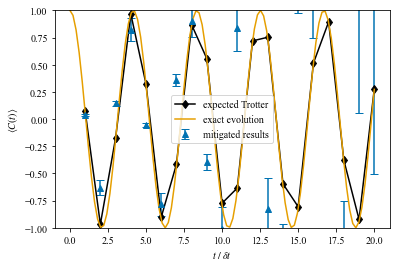

In [163]:

# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatanothing), yerr=gv.sdev(edatanothing), fmt='o', color=colors[0], capsize=5,
#              label='no mitigation')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edataro), yerr=gv.sdev(edataro), fmt='d', color=colors[1], capsize=5,
#              label='RO + PS')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatand), yerr=gv.sdev(edatand), fmt='s', color=colors[2], capsize=5,
#              label='RO + PS + PT')
# # plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatand_r), yerr=gv.sdev(edatand_r), fmt='x', 
# #              color=colors[3], capsize=4, label='RO+PS+PT+RS')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(edata_r), yerr=gv.sdev(edata_r), fmt='^', 
             color=colors[5], capsize=4, label='mitigated results')
plt.plot(np.linspace(1, 20, 20), obs, 'd-', color=colors[0], label='expected Trotter')
plt.plot(np.linspace(0, 20, 100), np.cos( 1.50611001 * np.linspace(0, 20, 100)),
         color=colors[1], label='exact evolution')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edata_r), yerr=gv.sdev(edata_r), fmt='d',
#              fillstyle='none', capsize=4, label='DD+PT+RS')
plt.ylim(-1, 1)
plt.legend()
plt.ylabel(r'$\langle C(t) \rangle$')
plt.xlabel(r'$t~ /~ \delta t$')
plt.savefig('sarahres.pdf')
# plt.errorbar(np.linspace(1, 20, 20), np.mean(rescale_data, axis=0),
#              yerr=np.std(rescale_data, axis=0) / np.sqrt(30), fmt='.', capsize=4)
# plt.plot(evolution_data[1])
# plt.plot(rescale_data[1])

In [147]:
xdata = np.linspace(1, 20, 20)
ydata = edata_r * gv.gvar(np.ones(20), np.ones(20) * 0.02)
trim = 18
def fcn(x, p):
    return p[0] * gv.cos(p[1] * x) + p[2] * gv.cos(p[3] * x) + p[4] * gv.cos(p[5] * x)
fit = lsqfit.nonlinear_fit(data=(xdata[:trim], ydata[:trim]), fcn=fcn, p0=[1, 1.6, 0, 9, 0, 15])
print(fit)

Least Square Fit (no prior):
  chi2/dof [dof] = 3.7 [12]    Q = 1.6e-05    

Parameters:
              0    0.764 (46)     [   1 +- inf ]  
              1   1.6113 (45)     [ 1.6 +- inf ]  
              2   -0.094 (68)     [   0 +- inf ]  
              3     9.25 (14)     [   9 +- inf ]  
              4    0.037 (65)     [   0 +- inf ]  
              5    15.25 (31)     [  15 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 30/0.0)
  fitter = scipy_least_squares    method = trf



In [66]:
evolution = np.zeros(20)
rescale = np.zeros(20)
for i in range(20):
    for key in scale_counts[i].keys():
        key2 = np.binary_repr(int(key, 16), width=3)
        if key2.count('1') % 2 == 1:
            rescale[i] += scale_counts[i][key]
        else:
            rescale[i] -= scale_counts[i][key]
    for key in evolution_counts[i].keys():
        key2 = np.binary_repr(int(key, 16), width=3)
        if key2.count('1') % 2 == 1:
            evolution[i] += evolution_counts[i][key]
        else:
            evolution[i] -= evolution_counts[i][key]
rescale /= sum(scale_counts[0].values())
evolution /= sum(evolution_counts[0].values())

NameError: name 'scale_counts' is not defined

In [49]:
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(rdata), yerr=gv.sdev(rdata), fmt='o', capsize=4, color=colors[0], label='dynamic decoupling')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(rdatand), yerr=gv.sdev(rdatandro), fmt='d', capsize=4, color=colors[1], label='pauli-twirling')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(rdata), yerr=gv.sdev(rdata), fmt='x', capsize=4, color=colors[2], label='dynamic decoupling')
plt.legend()
plt.savefig('rescaling.pdf')

NameError: name 'rdatand' is not defined